<a href="https://colab.research.google.com/github/mralamdari/Computer-Vision-Projects/blob/main/Deep_Dream.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
base_model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet')

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
base_model.summary()

In [ ]:
layers = [base_model.get_layer(name).output for name in ['mixed3', 'mixed5']]

In [ ]:
deep_dream_model = tf.keras.Model(inputs=base_model.input, outputs=layers)

In [ ]:
img = tf.keras.preprocessing.image.load_img('6.jpg', target_size=(375, 225))

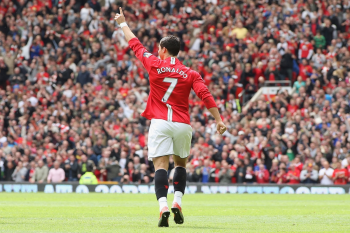

In [ ]:
image = tf.keras.preprocessing.image.img_to_array(img)

image = tf.keras.applications.inception_v3.preprocess_input(image)

In [ ]:
activations = deep_dreem_model.predict(tf.expand_dims(image, axis=0))

In [ ]:
len(activations), activations[0].shape, activations[1].shape

In [ ]:
def loss_calculator(img, network):
  img = tf.expand_dims(img, axis=0)
  activations = network(img)

  losses = []
  for a in activations:
    loss = tf.math.reduce_mean(a)
    losses.append(loss)
  
  return tf.reduce_sum(losses)

In [ ]:
loss_calculator(image, deep_dream_model)

<tf.Tensor: shape=(), dtype=float32, numpy=0.62921214>

In [ ]:
@tf.function
def deep_dream(network, image, learning_rate):
  with tf.GradientTape() as tape:
    tape.watch(image)
    loss = loss_calculator(image, network)

  gradients = tape.gradient(loss, image)
  gradients /=tf.math.reduce_std(gradients)
  image = image + gradients*learning_rate
  image = tf.clip_by_value(image, -1, 1)

  return loss, image

In [ ]:
def inverse_tranform(image):
  image = 255* (image+1.0) / 2.0
  return tf.cast(image, tf.uint8)

In [ ]:
def run_deep_dream(network, image, epochs, learning_rate):
  for epoch in range(epochs):
    loss, image = deep_dream(network, image, learning_rate)

    if epoch % 200 == 0:
      plt.figure(figsize=(8, 8))
      plt.imshow(inverse_tranform(image))
      plt.show()
      print(f'Epoch {epoch}, Loss {loss}')

In [ ]:
run_deep_dream(network=deep_dream_model, image=image, epochs=8000, learning_rate=0.001)

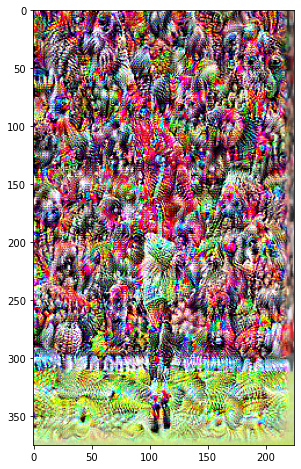